In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

In [3]:
# Load the dataset
file_path = 'FinalSentiment.csv'
df = pd.read_csv(file_path)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46270 entries, 0 to 46269
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   date_collected                     46270 non-null  object 
 1   author                             46270 non-null  object 
 2   age                                46270 non-null  int64  
 3   gender                             46270 non-null  object 
 4   location                           46270 non-null  object 
 5   statement                          46270 non-null  object 
 6   status                             46270 non-null  object 
 7   mental_illness_type                46270 non-null  object 
 8   Mental_Illness_Category            46270 non-null  object 
 9   text_length                        46270 non-null  int64  
 10  encoded_status                     46270 non-null  int64  
 11  statement_avg_word_length          4

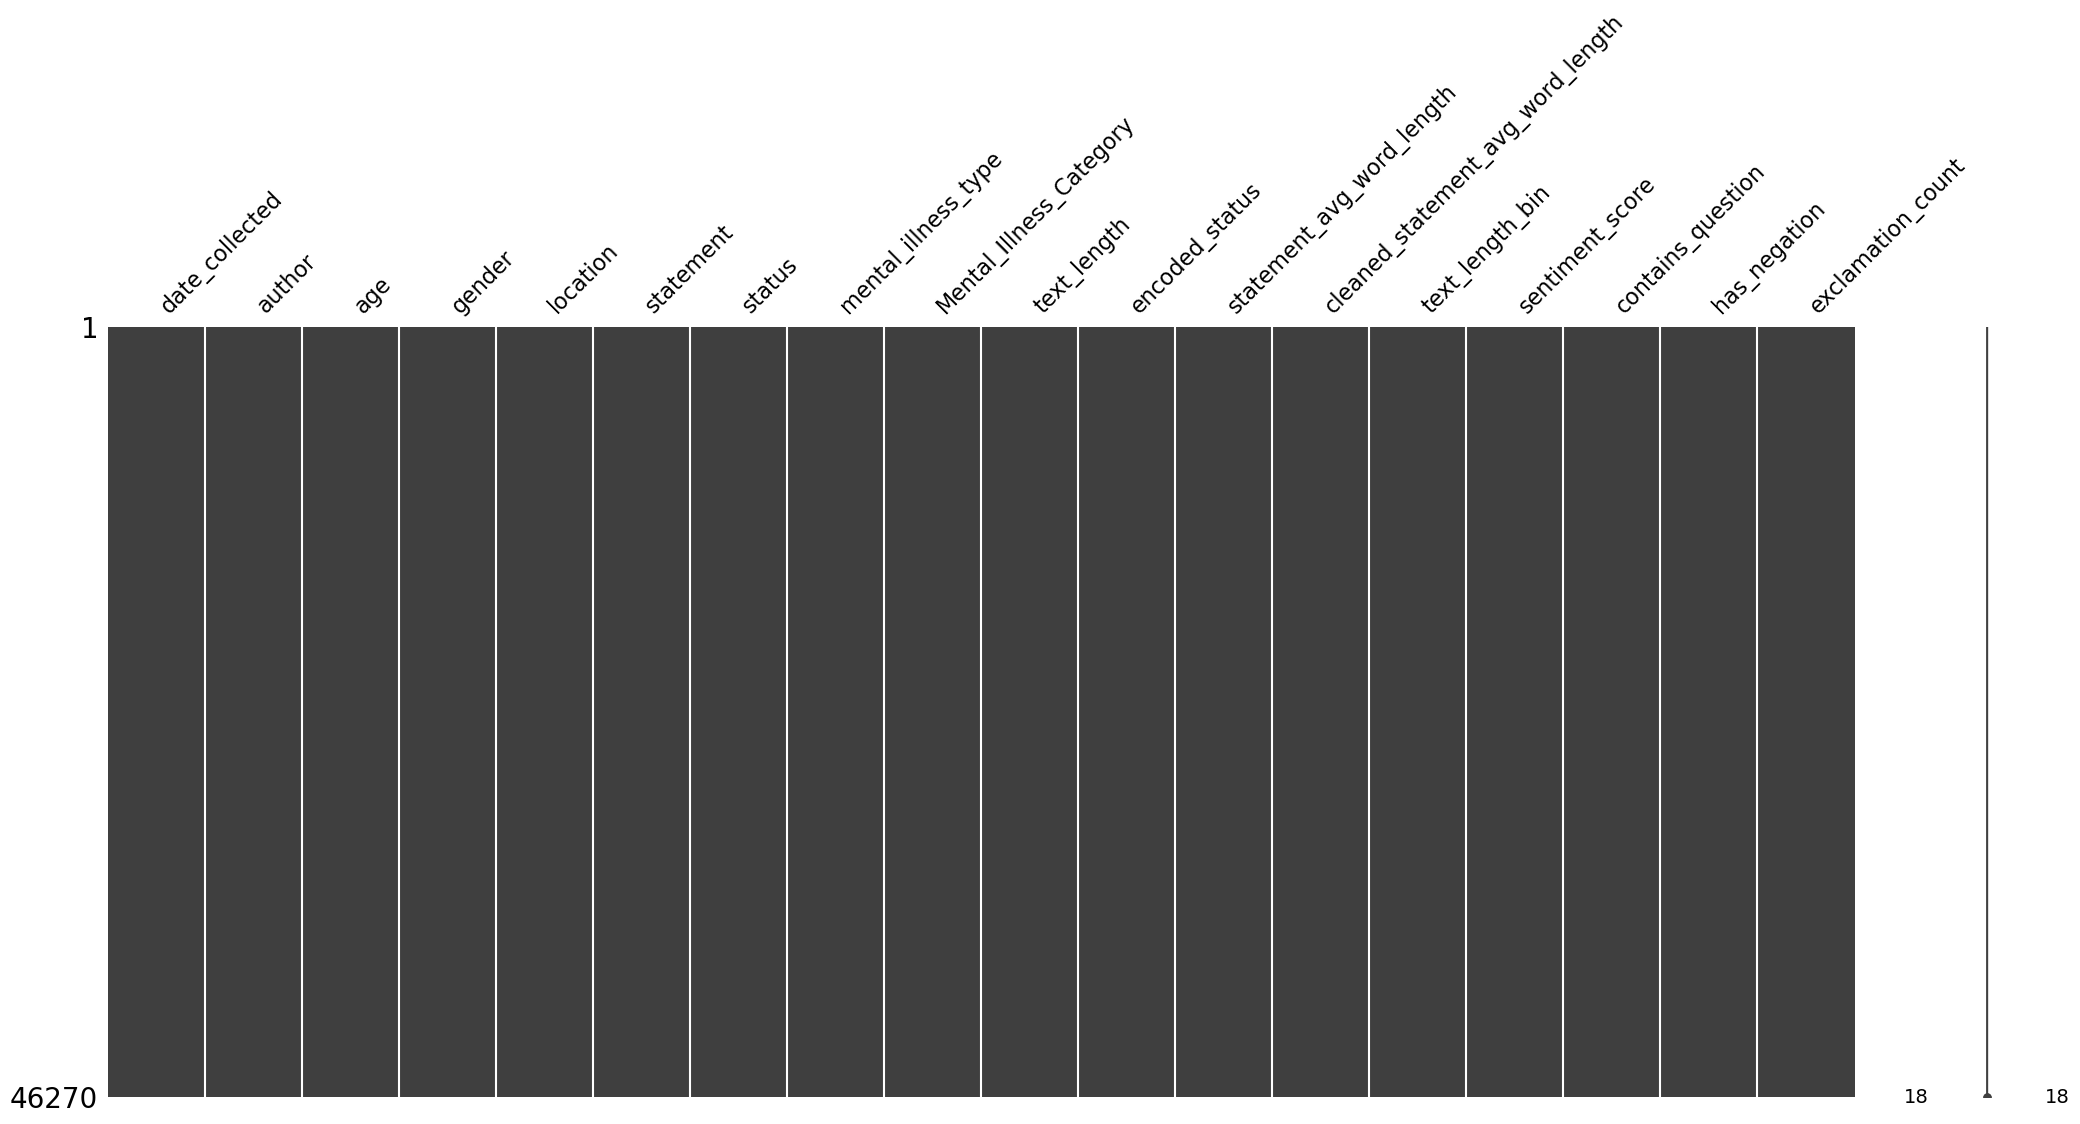

C:\Users\abcd\AppData\Local\Temp\ipykernel_17180\1938443320.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\abcd\AppData\Local\Temp\ipykernel_17180\1938443320.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For


Number of duplicate rows: 0


In [5]:
# CLEANING
print("Dataset Overview:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
msno.matrix(df)
plt.show()

for column in df.select_dtypes(include=['number']).columns:
    df[column].fillna(df[column].median(), inplace=True)
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)

In [6]:
# EDA
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
       date_collected          author           age gender location  \
count           46270           46270  46270.000000  46270    46270   
unique           1492           40752           NaN      2       14   
top        01-01-2021  Dr. John Smith           NaN   Male      USA   
freq               50              11           NaN  23578    13941   
mean              NaN             NaN     50.100086    NaN      NaN   
std               NaN             NaN     23.363616    NaN      NaN   
min               NaN             NaN     10.000000    NaN      NaN   
25%               NaN             NaN     30.000000    NaN      NaN   
50%               NaN             NaN     50.000000    NaN      NaN   
75%               NaN             NaN     70.000000    NaN      NaN   
max               NaN             NaN     90.000000    NaN      NaN   

                statement  status mental_illness_type Mental_Illness_Category  \
count               46270   46270            


📌 Missing Values Count:
date_collected                       0
author                               0
age                                  0
gender                               0
location                             0
statement                            0
status                               0
mental_illness_type                  0
Mental_Illness_Category              0
text_length                          0
encoded_status                       0
statement_avg_word_length            0
cleaned_statement_avg_word_length    0
text_length_bin                      0
sentiment_score                      0
contains_question                    0
has_negation                         0
exclamation_count                    0
dtype: int64


<Figure size 1000x600 with 0 Axes>

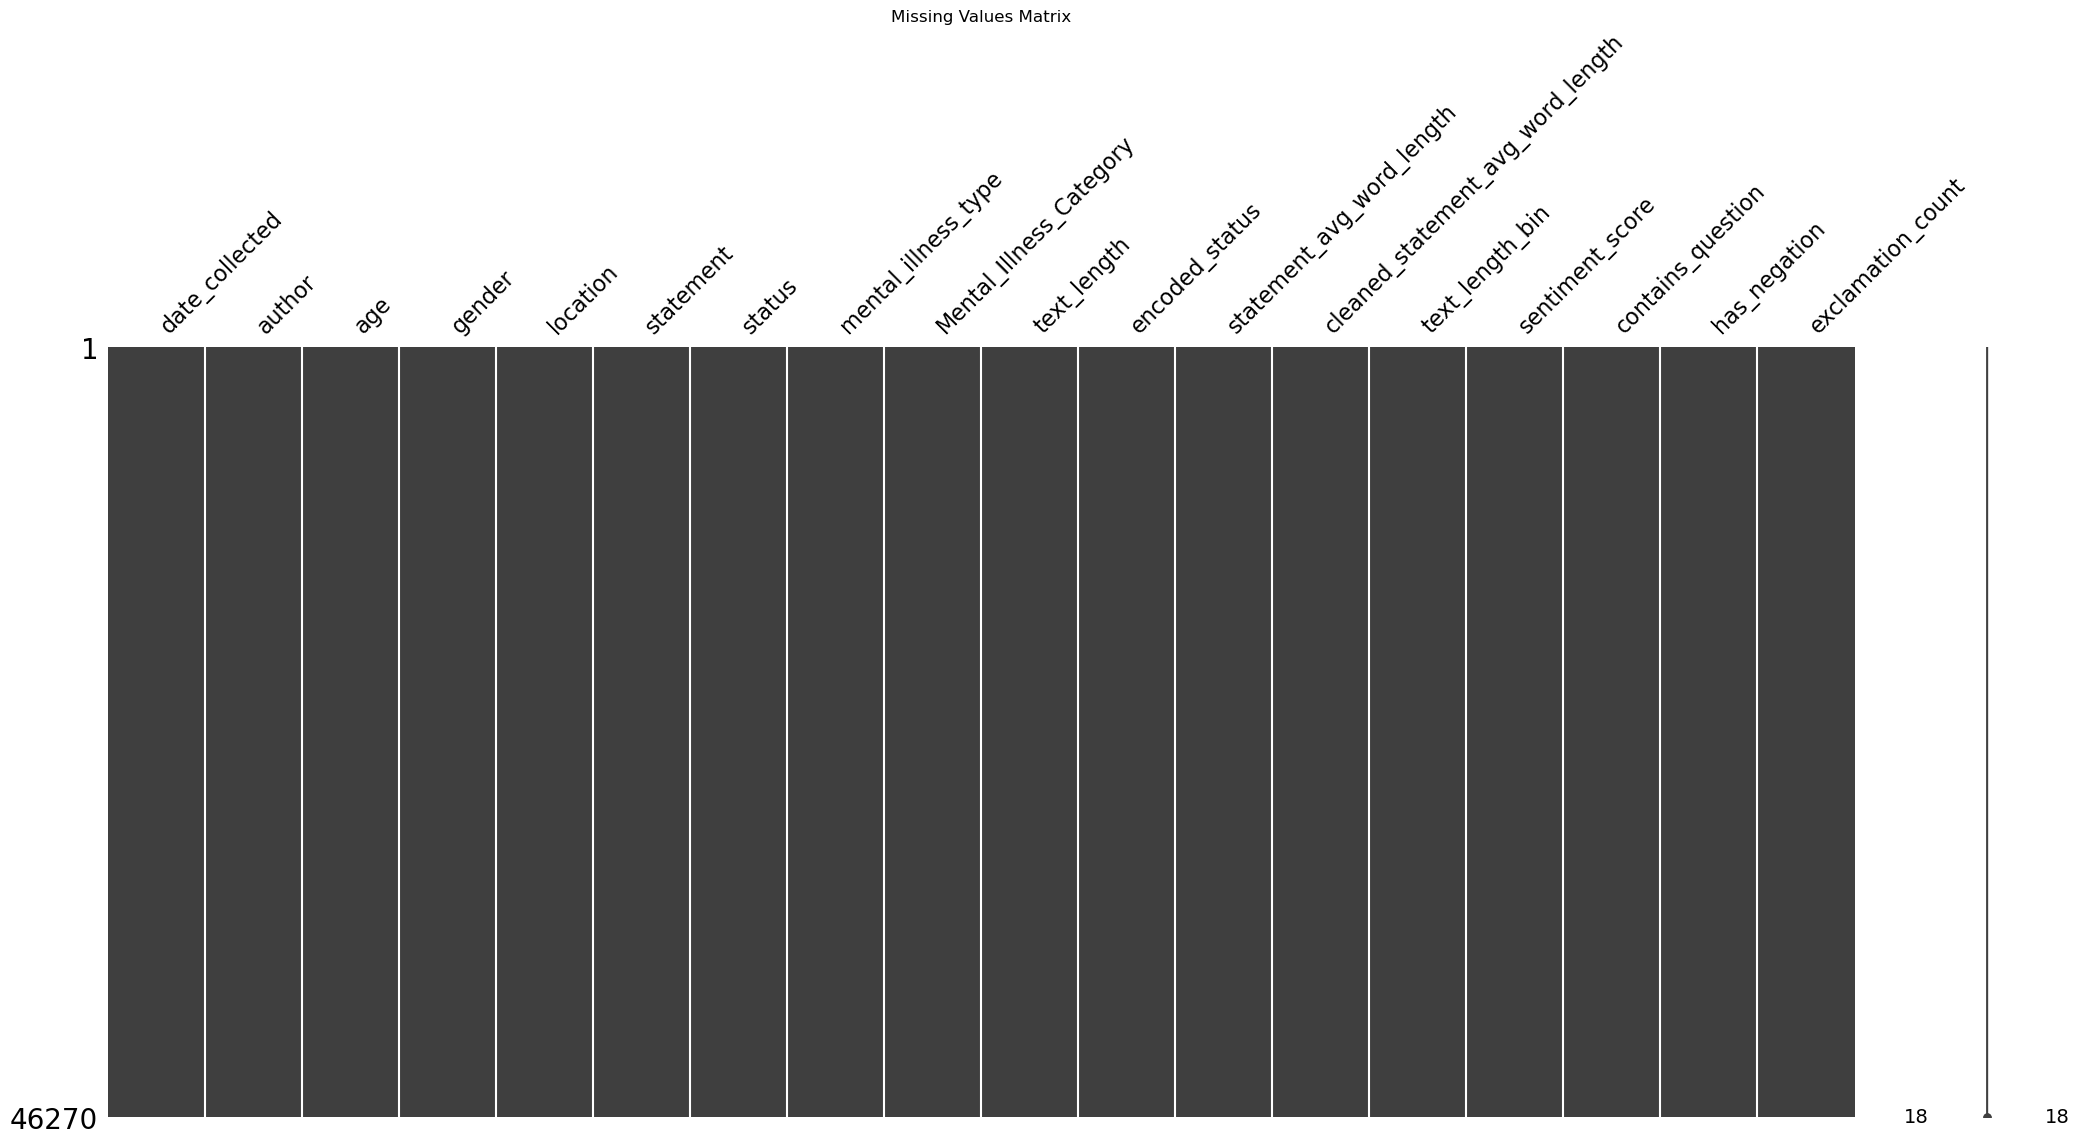

In [9]:
# Check for missing values
print("\n📌 Missing Values Count:")
print(df.isnull().sum())

# Visualizing missing values
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title("Missing Values Matrix")
plt.show()

# Fill missing values (Temporary for EDA)
df.fillna("Missing", inplace=True)

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abcd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True


📊 Status Distribution:
status
normal                  14441
depression              13481
suicidal                 9425
anxiety                  3365
bipolar                  2469
stress                   2191
personality disorder      898
Name: count, dtype: int64


C:\Users\abcd\AppData\Local\Temp\ipykernel_17180\309514115.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['status'], palette='coolwarm', order=df['status'].value_counts().index)


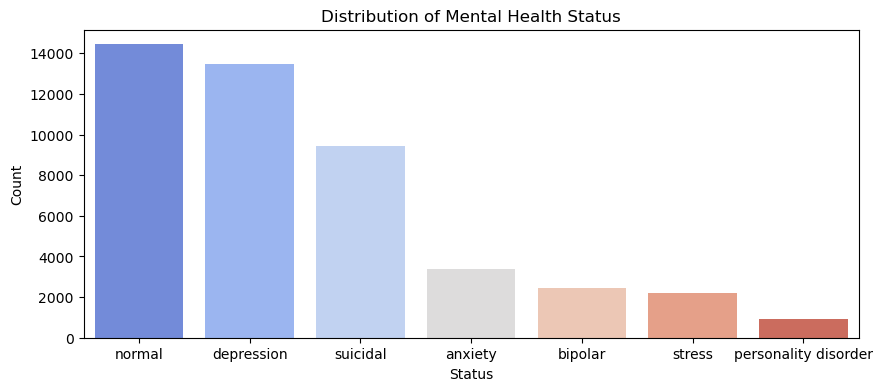

In [23]:
if 'status' in df.columns:
    print("\n📊 Status Distribution:")
    print(df['status'].value_counts())

    plt.figure(figsize=(10, 4))
    sns.countplot(x=df['status'], palette='coolwarm', order=df['status'].value_counts().index)
    plt.title("Distribution of Mental Health Status")
    plt.xlabel("Status")
    plt.ylabel("Count")
    plt.show()

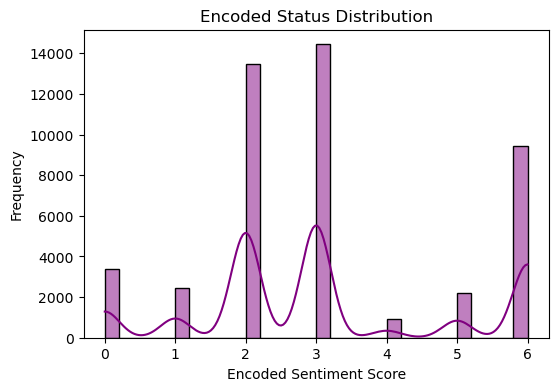

In [25]:
if 'encoded_status' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df['encoded_status'], bins=30, kde=True, color='purple')
    plt.title("Encoded Status Distribution")
    plt.xlabel("Encoded Sentiment Score")
    plt.ylabel("Frequency")
    plt.show()


📌 Statement Length Stats:
count    46270.000000
mean       104.196304
std        122.769622
min          1.000000
25%         15.000000
50%         62.000000
75%        145.000000
max        790.000000
Name: statement_length, dtype: float64


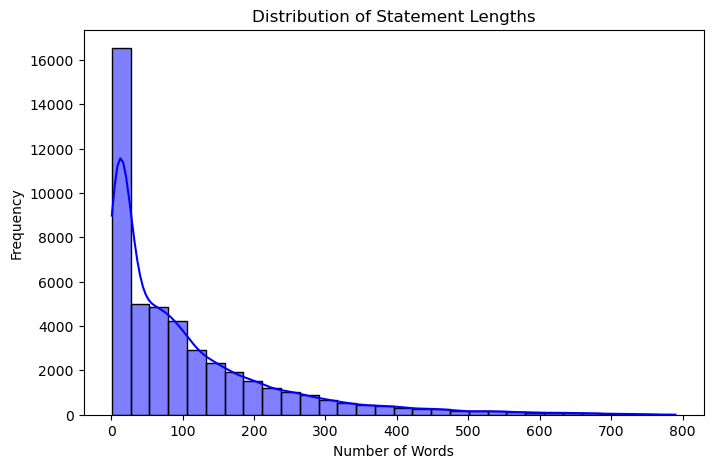

In [27]:
if 'statement' in df.columns:
    print("\n📌 Statement Length Stats:")
    df['statement_length'] = df['statement'].apply(lambda x: len(str(x).split()))
    print(df['statement_length'].describe())

    plt.figure(figsize=(8, 5))
    sns.histplot(df['statement_length'], bins=30, kde=True, color='blue')
    plt.title("Distribution of Statement Lengths")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abcd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


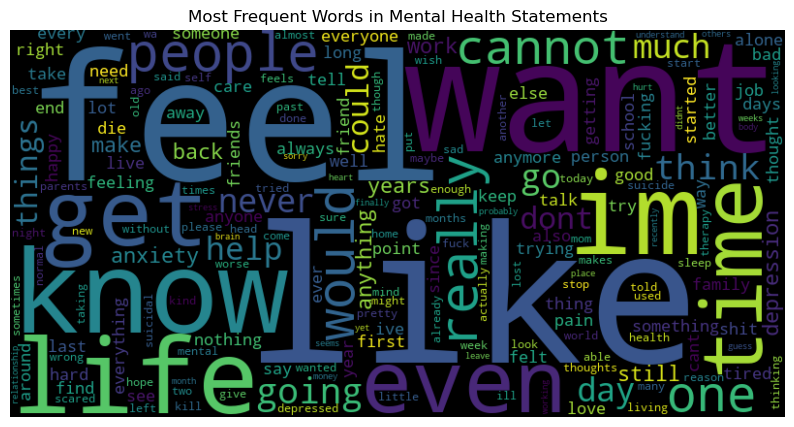

In [31]:
# WordCloud for most frequent words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_statement'] = df['statement'].apply(clean_text)
all_words = " ".join(df['clean_statement'])
word_counts = Counter(all_words.split())

plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Mental Health Statements")
plt.show()

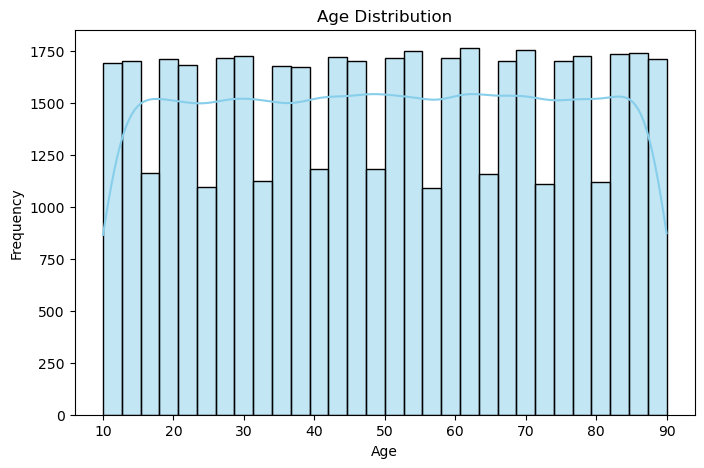

In [33]:
if 'age' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_17180\1579816150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'], palette='coolwarm')


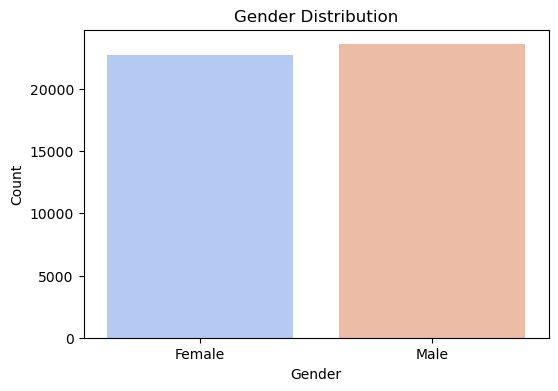

In [35]:
if 'gender' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df['gender'], palette='coolwarm')
    plt.title("Gender Distribution")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_17180\300434056.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


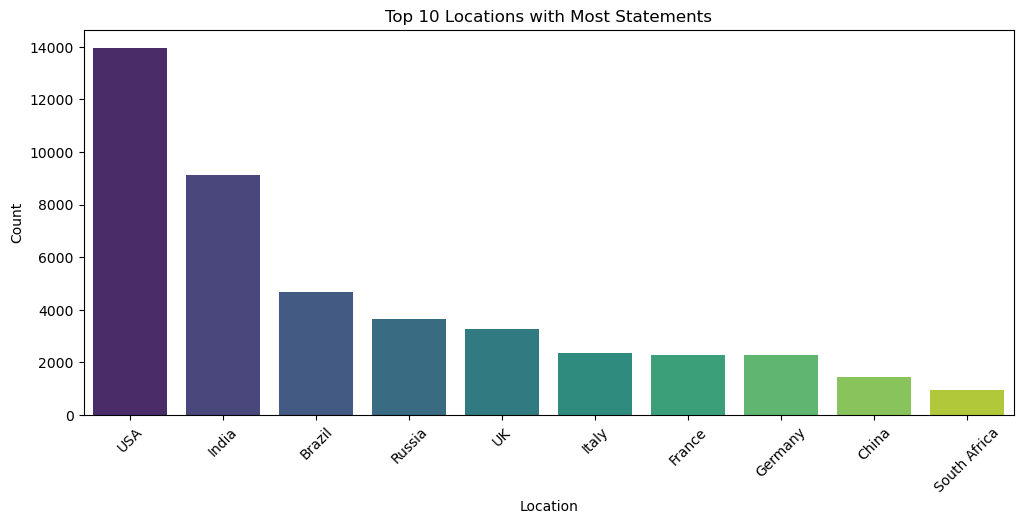

In [37]:
if 'location' in df.columns:
    plt.figure(figsize=(12, 5))
    top_locations = df['location'].value_counts().head(10)
    sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')
    plt.xticks(rotation=45)
    plt.title("Top 10 Locations with Most Statements")
    plt.xlabel("Location")
    plt.ylabel("Count")
    plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_17180\3629447820.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Mental_Illness_Category'], order=df['Mental_Illness_Category'].value_counts().index, palette='viridis')


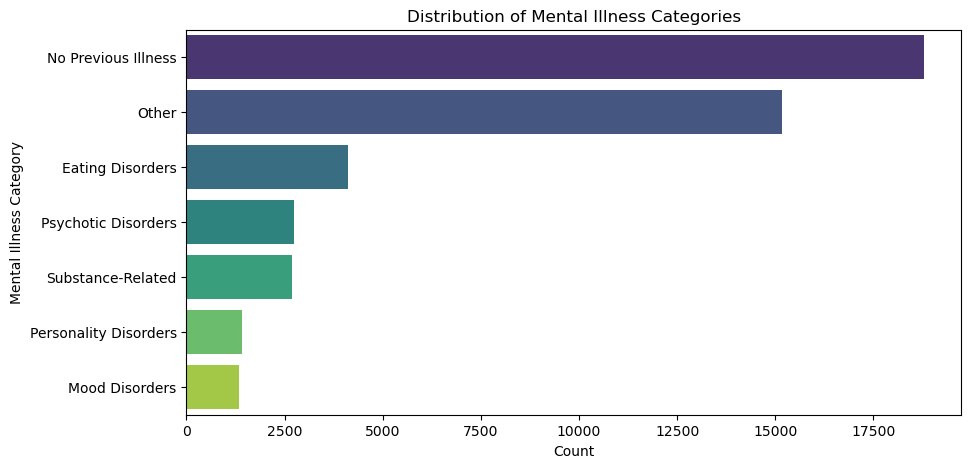

In [41]:
# Mental illness category distribution
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Mental_Illness_Category'], order=df['Mental_Illness_Category'].value_counts().index, palette='viridis')
plt.title("Distribution of Mental Illness Categories")
plt.xlabel("Count")
plt.ylabel("Mental Illness Category")
plt.show()

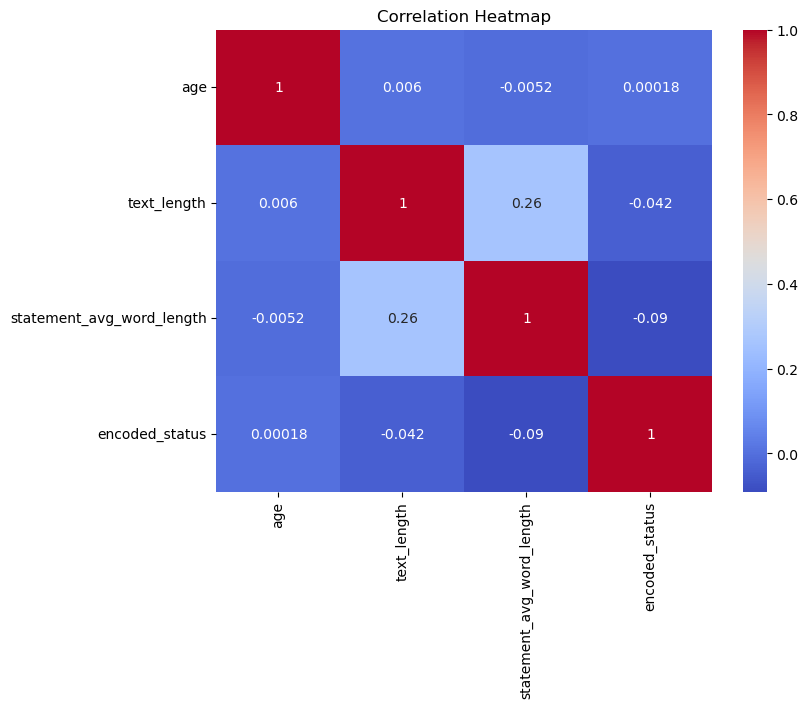

In [45]:
# Heatmap of numerical correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df[['age', 'text_length', 'statement_avg_word_length', 'encoded_status']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_17180\1733178199.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['gender'], y=df['encoded_status'], palette="coolwarm")


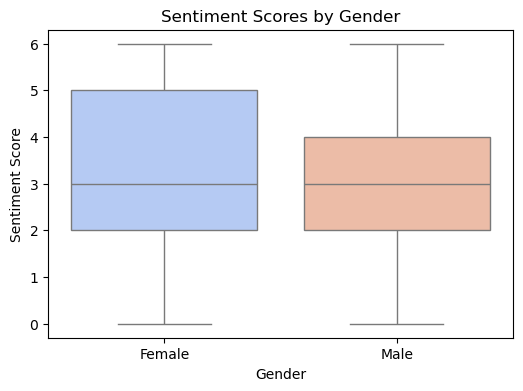

In [47]:
# Gender sentiment analysis
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['gender'], y=df['encoded_status'], palette="coolwarm")
plt.title("Sentiment Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Sentiment Score")
plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_17180\2700332367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['Mental_Illness_Category'], x=df['encoded_status'], palette='viridis')


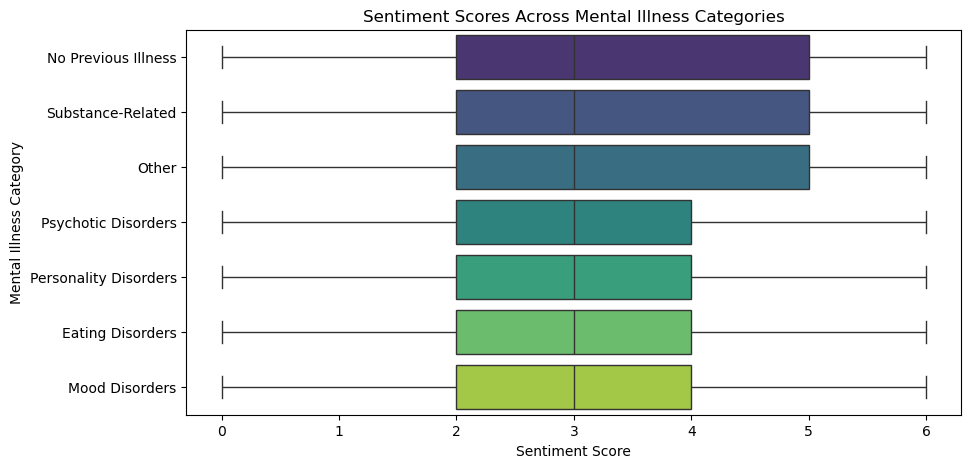

In [51]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=df['Mental_Illness_Category'], x=df['encoded_status'], palette='viridis')
plt.title("Sentiment Scores Across Mental Illness Categories")
plt.xlabel("Sentiment Score")
plt.ylabel("Mental Illness Category")
plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_17180\1127867473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[df['location'].isin(top_locations)]['location'], x=df['encoded_status'], palette="viridis")


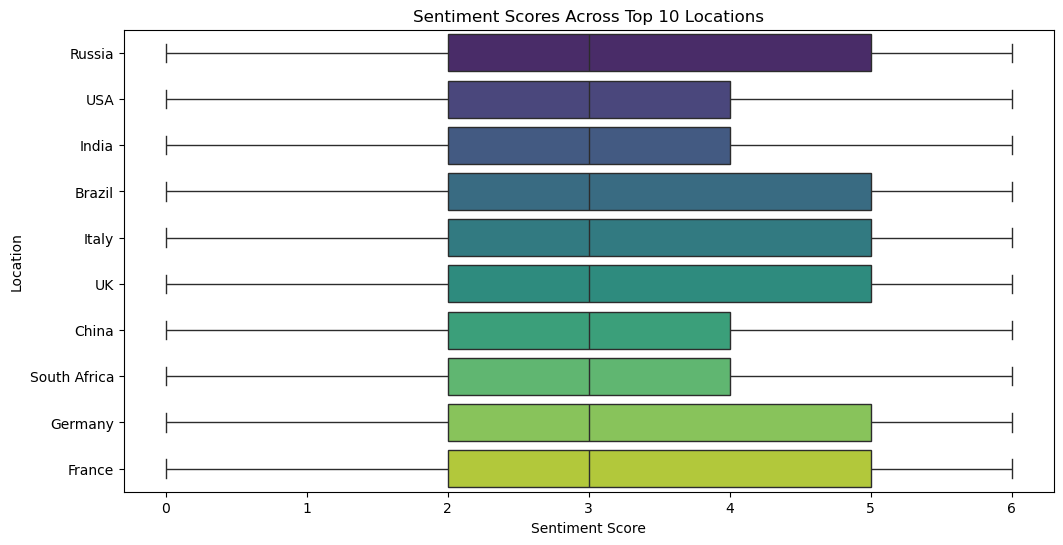

In [53]:
plt.figure(figsize=(12, 6))
top_locations = df['location'].value_counts().nlargest(10).index
sns.boxplot(y=df[df['location'].isin(top_locations)]['location'], x=df['encoded_status'], palette="viridis")
plt.title("Sentiment Scores Across Top 10 Locations")
plt.xlabel("Sentiment Score")
plt.ylabel("Location")
plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_17180\239391206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Mental_Illness_Category'], order=df['Mental_Illness_Category'].value_counts().index, palette="mako")


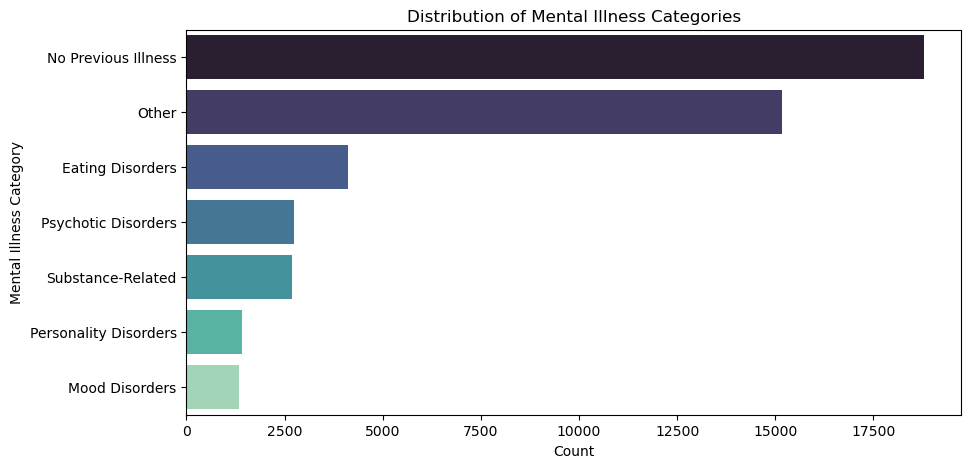

In [57]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Mental_Illness_Category'], order=df['Mental_Illness_Category'].value_counts().index, palette="mako")
plt.title("Distribution of Mental Illness Categories")
plt.xlabel("Count")
plt.ylabel("Mental Illness Category")
plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_17180\3029078635.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['age_group'], y=df['encoded_status'], palette="Set2")


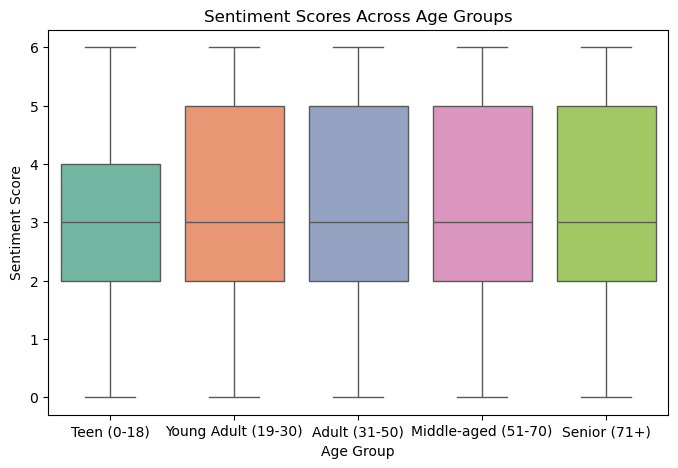

In [61]:
# Define Age Groups
bins = [0, 18, 30, 50, 70, 100]
labels = ['Teen (0-18)', 'Young Adult (19-30)', 'Adult (31-50)', 'Middle-aged (51-70)', 'Senior (71+)']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Plot Sentiment Score by Age Group
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['age_group'], y=df['encoded_status'], palette="Set2")
plt.title("Sentiment Scores Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Sentiment Score")
plt.show()

C:\Users\abcd\AppData\Local\Temp\ipykernel_17180\3581451903.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['text_length_category'], y=df['encoded_status'], palette="coolwarm")


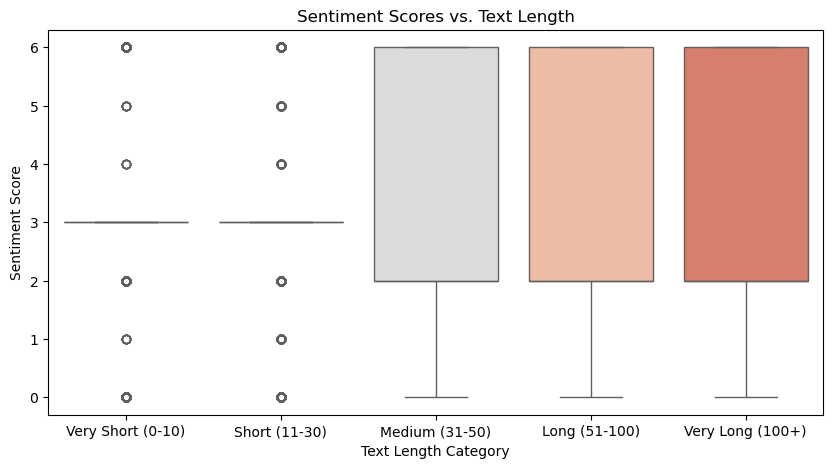

In [63]:
# Categorizing Text Length
df['text_length_category'] = pd.cut(df['statement_length'], 
                                    bins=[0, 10, 30, 50, 100, 200], 
                                    labels=['Very Short (0-10)', 'Short (11-30)', 'Medium (31-50)', 'Long (51-100)', 'Very Long (100+)'])

# Boxplot for Sentiment vs Text Length
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['text_length_category'], y=df['encoded_status'], palette="coolwarm")
plt.title("Sentiment Scores vs. Text Length")
plt.xlabel("Text Length Category")
plt.ylabel("Sentiment Score")
plt.show()

In [65]:
from collections import Counter

# Define sentiment categories
df['sentiment_category'] = pd.cut(df['encoded_status'], bins=[-1, -0.5, 0.5, 1], labels=['Negative', 'Neutral', 'Positive'])

# Function to get most common words
def get_top_words(category, num_words=20):
    text = " ".join(df[df['sentiment_category'] == category]['clean_statement'])
    word_counts = Counter(text.split())
    return word_counts.most_common(num_words)

# Get top words for each sentiment category
top_negative_words = get_top_words('Negative')
top_neutral_words = get_top_words('Neutral')
top_positive_words = get_top_words('Positive')

print("🔴 Top Negative Words:", top_negative_words)
print("⚪ Top Neutral Words:", top_neutral_words)
print("🟢 Top Positive Words:", top_positive_words)

🔴 Top Negative Words: []
⚪ Top Neutral Words: [('im', 5207), ('anxiety', 3140), ('like', 2664), ('ive', 2315), ('feel', 1878), ('dont', 1695), ('get', 1669), ('know', 1538), ('really', 1334), ('time', 1290), ('something', 1050), ('back', 1039), ('even', 1003), ('go', 992), ('cant', 991), ('going', 988), ('feeling', 976), ('one', 967), ('pain', 961), ('heart', 945)]
🟢 Top Positive Words: [('im', 4962), ('like', 2608), ('feel', 2064), ('ive', 1915), ('dont', 1914), ('bipolar', 1587), ('know', 1539), ('get', 1516), ('really', 1282), ('time', 1216), ('want', 1114), ('cant', 974), ('even', 942), ('life', 923), ('anyone', 889), ('one', 866), ('going', 845), ('people', 818), ('meds', 815), ('would', 793)]


In [67]:
from itertools import combinations

# Extract all mental illness labels
df['Mental_Illness_Category'] = df['Mental_Illness_Category'].astype(str)
all_illnesses = df['Mental_Illness_Category'].apply(lambda x: x.split(", "))

# Count co-occurrences
co_occurrence = Counter([pair for sublist in all_illnesses for pair in combinations(sublist, 2)])

# Convert to DataFrame
co_df = pd.DataFrame(co_occurrence.items(), columns=['Pair', 'Count']).sort_values(by="Count", ascending=False)

# Top 10 Co-Occurrences
print(co_df.head(10))

Empty DataFrame
Columns: [Pair, Count]
Index: []


In [83]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['encoded_status'].quantile(0.25)
Q3 = df['encoded_status'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['encoded_status'] < lower_bound) | (df['encoded_status'] > upper_bound)]
print(f"🔴 Found {outliers.shape[0]} outliers.")

# Display some outliers
outliers[['clean_statement', 'encoded_status']].head(10)


🔴 Found 0 outliers.


,clean_statement,encoded_status


In [85]:
from scipy.stats import zscore

# Compute Z-score
df['z_score'] = zscore(df['encoded_status'])

# Define outlier threshold (values with |Z| > 3 are considered outliers)
outliers_z = df[df['z_score'].abs() > 3]
print(f"🔴 Found {outliers_z.shape[0]} extreme outliers using Z-score method.")

# Display some extreme cases
outliers_z[['clean_statement', 'encoded_status', 'z_score']].head(10)

🔴 Found 0 extreme outliers using Z-score method.


,clean_statement,encoded_status,z_score


In [89]:
# Mean before removing outliers
mean_before = df['encoded_status'].mean()

# Mean after removing outliers
df_no_outliers = df[(df['encoded_status'] >= lower_bound) & (df['encoded_status'] <= upper_bound)]
mean_after = df_no_outliers['encoded_status'].mean()

print(f"📌 Mean Sentiment Score Before Removing Outliers: {mean_before:.2f}")
print(f"📌 Mean Sentiment Score After Removing Outliers: {mean_after:.2f}")

📌 Mean Sentiment Score Before Removing Outliers: 3.11
📌 Mean Sentiment Score After Removing Outliers: 3.11


In [91]:
print("🔴 Extreme Negative Sentences:")
print(outliers[outliers['encoded_status'] < lower_bound]['clean_statement'].head(5))

print("\n🟢 Extreme Positive Sentences:")
print(outliers[outliers['encoded_status'] > upper_bound]['clean_statement'].head(5))

🔴 Extreme Negative Sentences:
Series([], Name: clean_statement, dtype: object)

🟢 Extreme Positive Sentences:
Series([], Name: clean_statement, dtype: object)


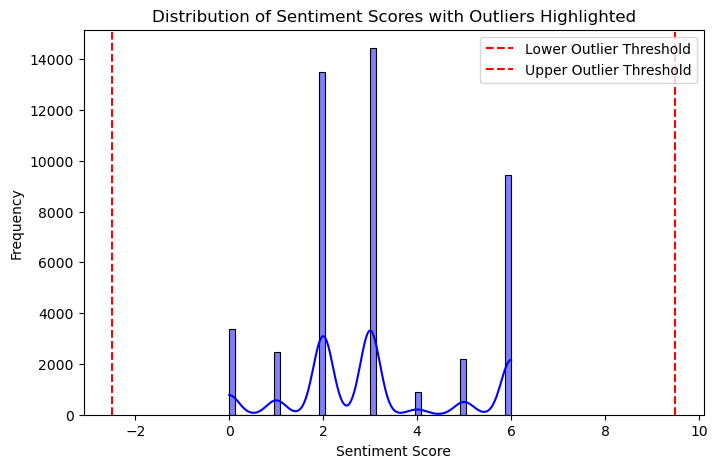

In [87]:
plt.figure(figsize=(8, 5))
sns.histplot(df['encoded_status'], bins=50, kde=True, color="blue")
plt.axvline(lower_bound, color='red', linestyle='dashed', label="Lower Outlier Threshold")
plt.axvline(upper_bound, color='red', linestyle='dashed', label="Upper Outlier Threshold")
plt.title("Distribution of Sentiment Scores with Outliers Highlighted")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()